A “true price/rating” metric that also takes into account the delivery fee and estimated delivery time.

In [3]:
import os

os.chdir('C:/Users/esram/OneDrive/Desktop/esrabecode/delivery-market-analysis')

os.getcwd()

'C:\\Users\\esram\\OneDrive\\Desktop\\esrabecode\\delivery-market-analysis'

subquery with WHERE 

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect('data/takeaway.db')

query = """ 
SELECT r.primarySlug,   
       r.name,
       r.city,
       r.ratings,
       r.ratingsNumber,
       r.deliveryFee,
       AVG(m.price) AS avg_price,
       AVG((r.durationRangeMin + r.durationRangeMax) / 2) AS avg_duration,
       (
         AVG(m.price)
         + r.deliveryFee
         + AVG((r.durationRangeMin + r.durationRangeMax) / 2.0)
       ) / r.ratings AS true_price_to_rating
     
FROM restaurants r
JOIN menuItems m
  ON r.primarySlug = m.primarySlug
WHERE r.primarySlug IN (
    SELECT primarySlug
    FROM restaurants
    ORDER BY ratingsNumber DESC
    LIMIT 200
)
GROUP BY r.primarySlug, r.name, r.city, r.ratings, r.ratingsNumber, r.deliveryFee
HAVING r.ratings > 4.5 
   AND AVG(m.price) > 0 
ORDER BY true_price_to_rating DESC
LIMIT 10;
"""
top_10 = pd.read_sql_query(query, conn)
top_10

,primarySlug,name,city,ratings,ratingsNumber,deliveryFee,avg_price,avg_duration,true_price_to_rating
0,singapore,Singapore,Borsbeek,4.7,3491,0.0,11.961472,52.0,13.715207
1,snack-georges-henri,Snack Georges Henri,Woluwe-Saint-Lambert,4.7,2363,0.0,8.893814,52.0,13.062514
2,sipan,Pizzeria Sipan,Betekom,4.7,1627,3.0,9.002959,42.0,11.596374
3,sushi-mama,Sushi Mama,Leuven,4.6,2203,0.0,10.161832,42.0,11.448224
4,pizza-vera,Pizza Vera,Vilvorde,4.6,3349,0.0,9.189362,42.0,11.236818
5,pinocchio-2170,Pinocchio,Merksem,4.6,2109,0.0,12.709071,37.0,10.915015
6,latelier-a-pizza-helmet,L'Atelier à Pizza,Schaerbeek,4.8,1558,0.0,9.641711,42.0,10.862857
7,sushiline-bruxelles,Sushiline,Bruxelles,4.9,3036,0.0,8.348661,42.0,10.377278
8,pizza-minute-schaerbeek,Pizza Minute,Schaerbeek,4.9,2833,0.0,8.000806,42.0,10.306287
9,pizza-taliano,Pizza Taliano,Zwevegem,4.6,1986,0.0,14.814198,32.0,10.285695


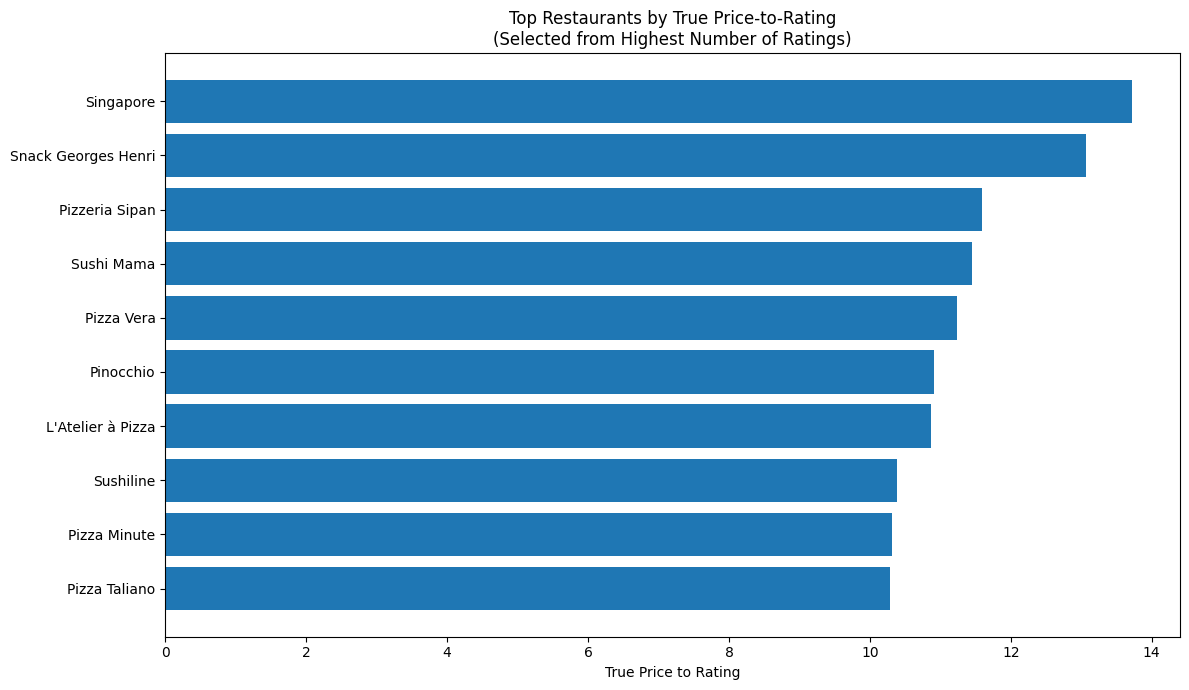

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))

plt.barh(
    top_10['name'],
    top_10['true_price_to_rating']
)

plt.xlabel('True Price to Rating')
plt.title('Top Restaurants by True Price-to-Rating\n(Selected from Highest Number of Ratings)')
plt.gca().invert_yaxis()  

plt.tight_layout()
plt.show()


Subquery version

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect('data/takeaway.db')

query_subquery_style = """
SELECT r.primarySlug,   
       r.name,
       r.city,
       r.ratings,
       r.ratingsNumber,
       r.deliveryFee,
       AVG(m.price) AS avg_price,
       AVG((r.durationRangeMin + r.durationRangeMax) / 2.0) AS avg_duration,
       (
         AVG(m.price)
         + r.deliveryFee
         + AVG((r.durationRangeMin + r.durationRangeMax) / 2.0)
       ) / r.ratings AS true_price_to_rating
FROM (
    SELECT *
    FROM restaurants
    ORDER BY ratingsNumber DESC
    LIMIT 200
) AS r
JOIN menuItems m
  ON r.primarySlug = m.primarySlug
GROUP BY r.primarySlug, r.name, r.city, r.ratings, r.ratingsNumber, r.deliveryFee
HAVING r.ratings > 4.5 
   AND AVG(m.price) > 0 
ORDER BY true_price_to_rating DESC
LIMIT 10;
"""

top_10_subquery = pd.read_sql_query(query_subquery_style, conn)
top_10_subquery


,primarySlug,name,city,ratings,ratingsNumber,deliveryFee,avg_price,avg_duration,true_price_to_rating
0,singapore,Singapore,Borsbeek,4.7,3491,0.0,11.961472,52.5,13.715207
1,snack-georges-henri,Snack Georges Henri,Woluwe-Saint-Lambert,4.7,2363,0.0,8.893814,52.5,13.062514
2,sipan,Pizzeria Sipan,Betekom,4.7,1627,3.0,9.002959,42.5,11.596374
3,sushi-mama,Sushi Mama,Leuven,4.6,2203,0.0,10.161832,42.5,11.448224
4,pizza-vera,Pizza Vera,Vilvorde,4.6,3349,0.0,9.189362,42.5,11.236818
5,pinocchio-2170,Pinocchio,Merksem,4.6,2109,0.0,12.709071,37.5,10.915015
6,latelier-a-pizza-helmet,L'Atelier à Pizza,Schaerbeek,4.8,1558,0.0,9.641711,42.5,10.862857
7,sushiline-bruxelles,Sushiline,Bruxelles,4.9,3036,0.0,8.348661,42.5,10.377278
8,pizza-minute-schaerbeek,Pizza Minute,Schaerbeek,4.9,2833,0.0,8.000806,42.5,10.306287
9,pizza-taliano,Pizza Taliano,Zwevegem,4.6,1986,0.0,14.814198,32.5,10.285695
